# 夏秋雨 2024112200


下面导入的类是我自己写的,方便代码复用，代码请看作业PDF

In [1]:
from deeplearning.instances.bindenergypredict.bindenergypredict import BindEnergyPredict

In [2]:
# 导包
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../DATA_FILES/binding_energy_data_2020.csv')

In [4]:
Z_datas = np.array(df["Z"]).reshape(-1, 1)
N_datas = np.array(df["N"]).reshape(-1, 1)
A_datas = np.array(df["A"]).reshape(-1, 1)
# 上面几行代码和下面的用于从csv中读取对应列的数据
# 并且下面的代码使用concatenate将这些数据合并

In [5]:
x_datas = np.concatenate((Z_datas, N_datas, A_datas), axis=1)
print(x_datas.shape)

(2471, 3)


In [6]:
y_datas = np.array(df["binding_energy"])

### 线性回归（LinearRegression）
### 画了三个图，第一个图是拟合图线和真实数据的对比
### 第二个图是相对误差和A的关系图
### 第三个图是相对误差的直方图，纵坐标是事例数
从直方图和相对误差图可以看到，线性回归拟合的误差稍微有点大，相对误差到达了70%

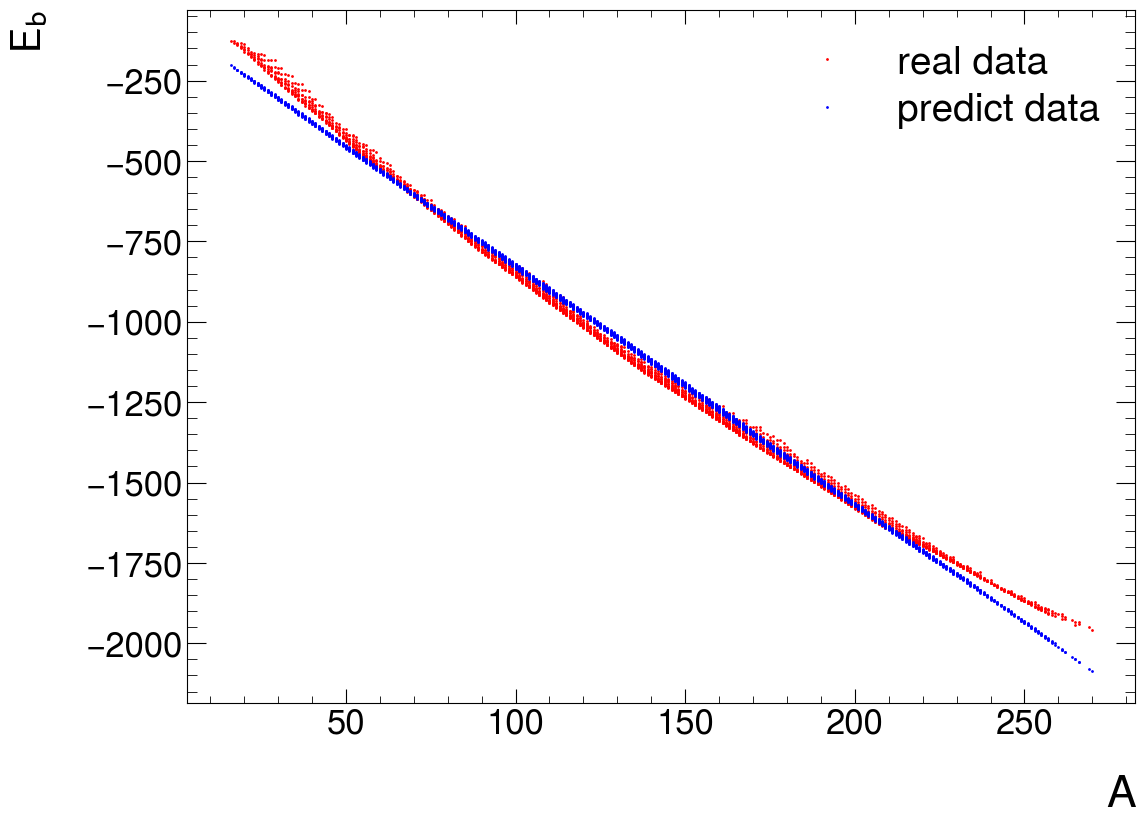

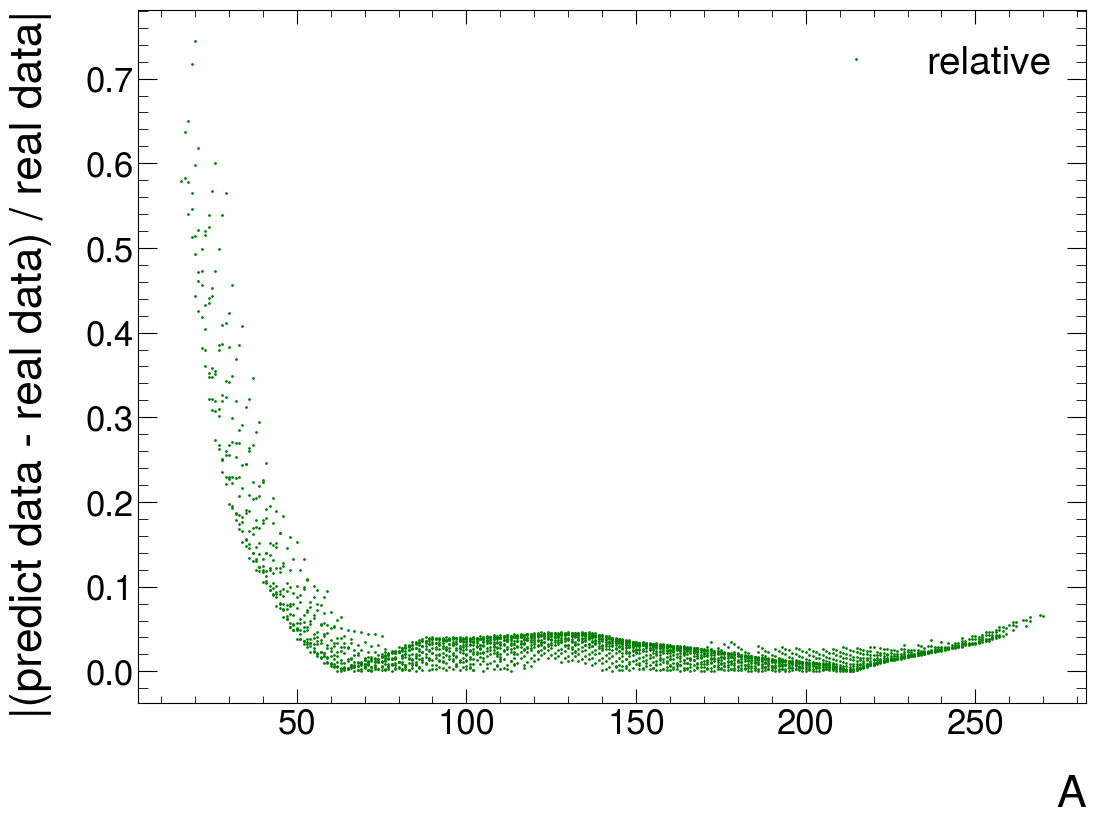

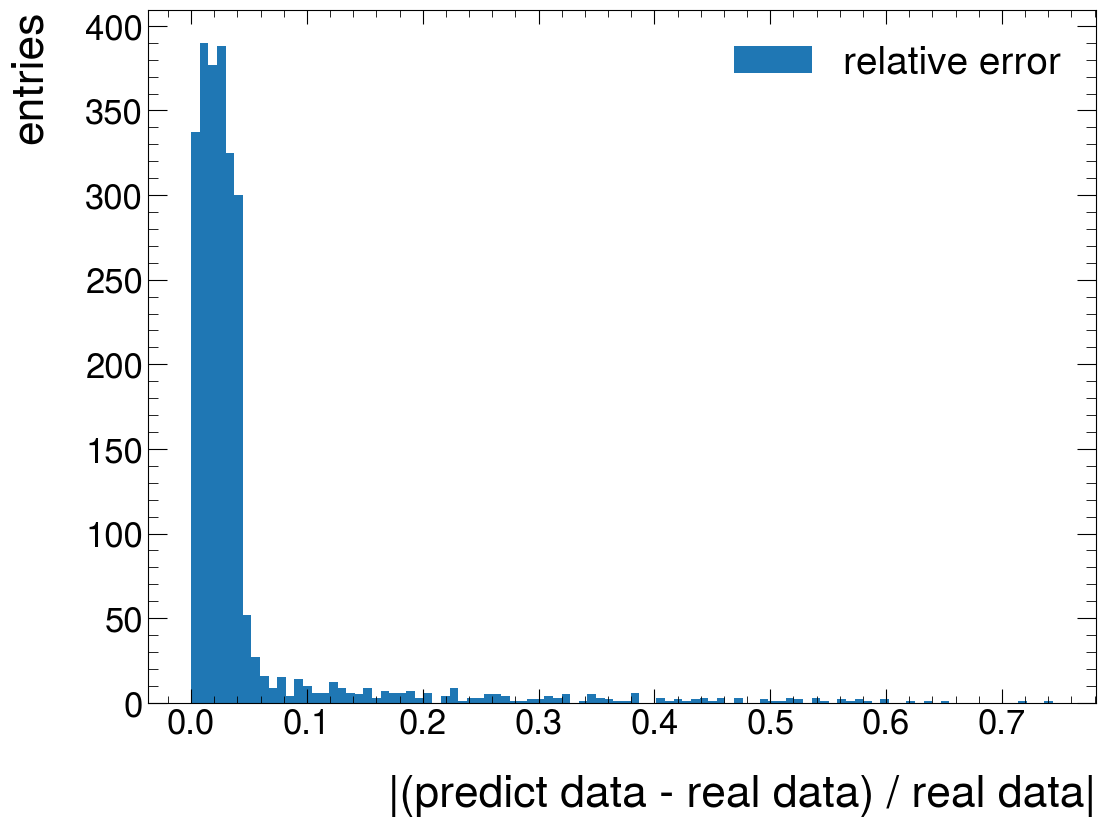

In [7]:
from sklearn.linear_model import LinearRegression

cl = BindEnergyPredict(x_datas, y_datas, LinearRegression())
cl.draw_2d()
cl.draw_relative_error()
cl.draw_hist_relative_error()

### 决策树
### 可以从对比图看出来，预测值和真实值完美重合了，所以我并不是只画了预测数据而没有画真实数据
### 在和周围人讨论的时候，他们提出过拟合的问题，但是我认为过拟合只会在预测未知的新粒子时起到负面影响，也就是所谓的在训练集上表现优异，在测试集上表现差
### 考虑到元素周期表上的元素就那么多基本上不会在增加了，所以我没有处理过拟合问题

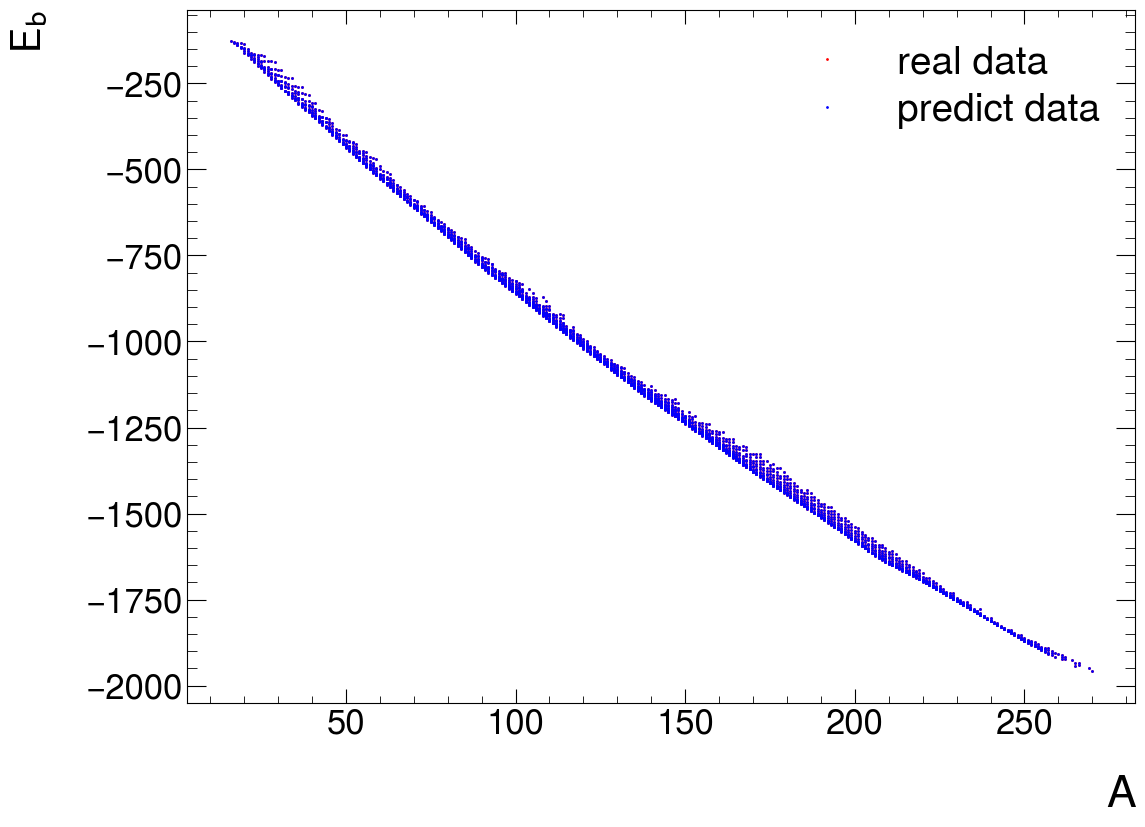

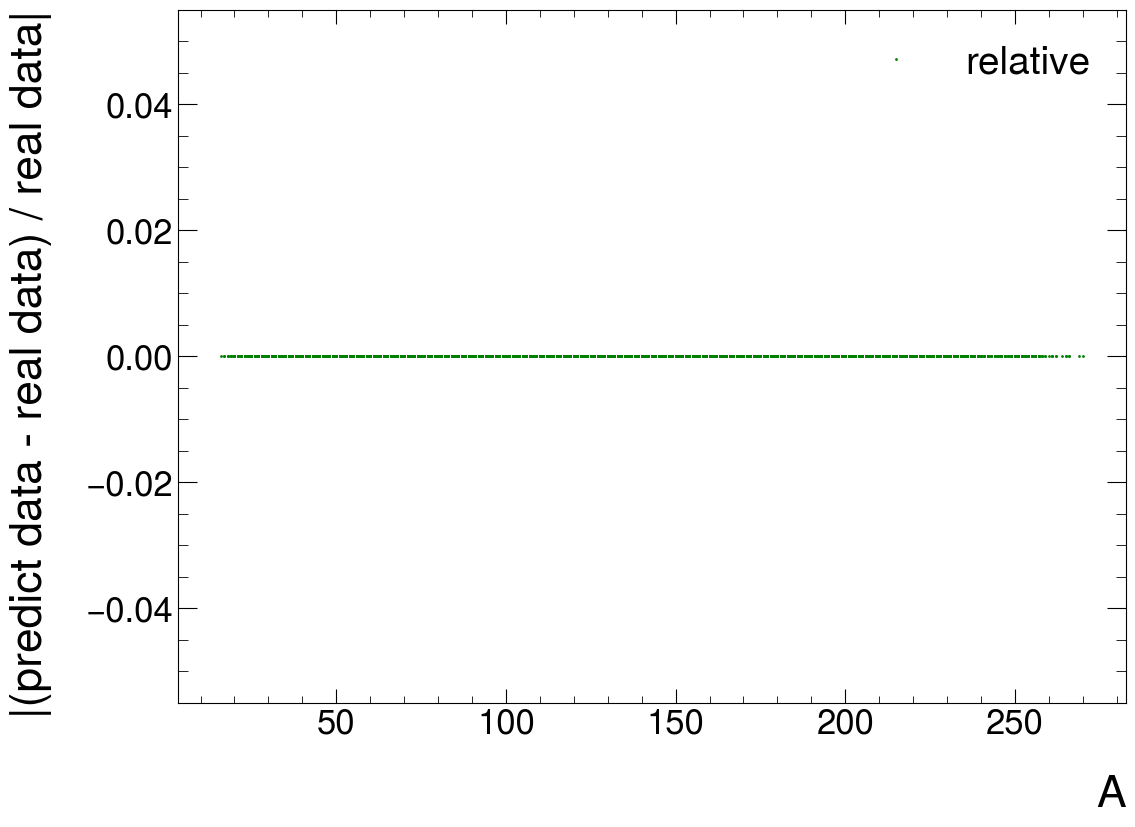

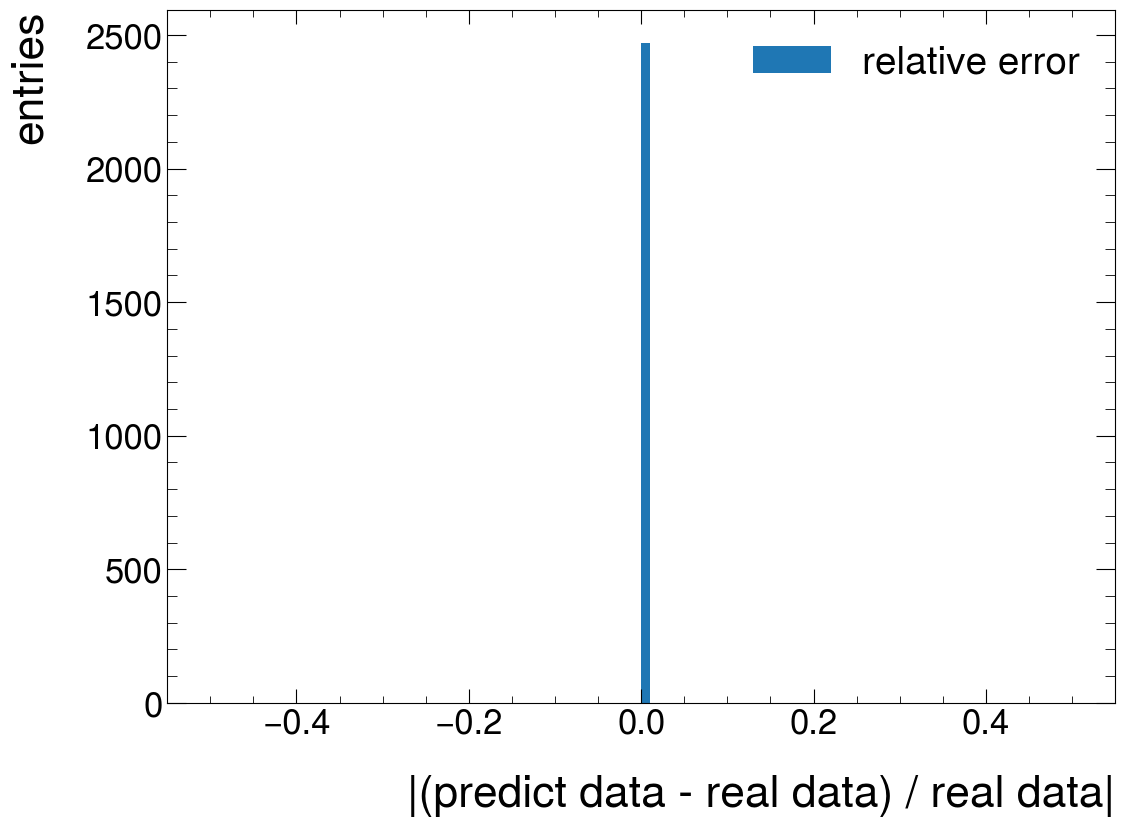

In [8]:
from sklearn.tree import DecisionTreeRegressor

cl = BindEnergyPredict(x_datas, y_datas, DecisionTreeRegressor())
cl.draw_2d()
cl.draw_relative_error()
cl.draw_hist_relative_error()

### 随机森林

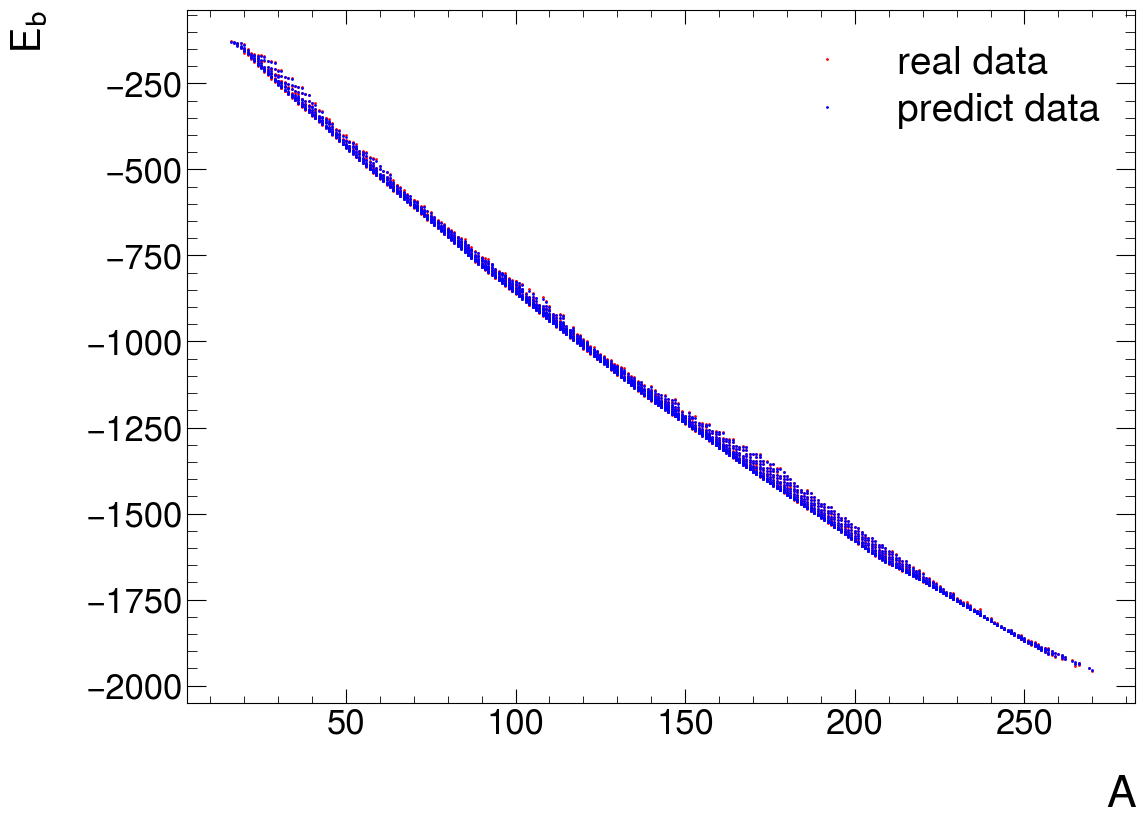

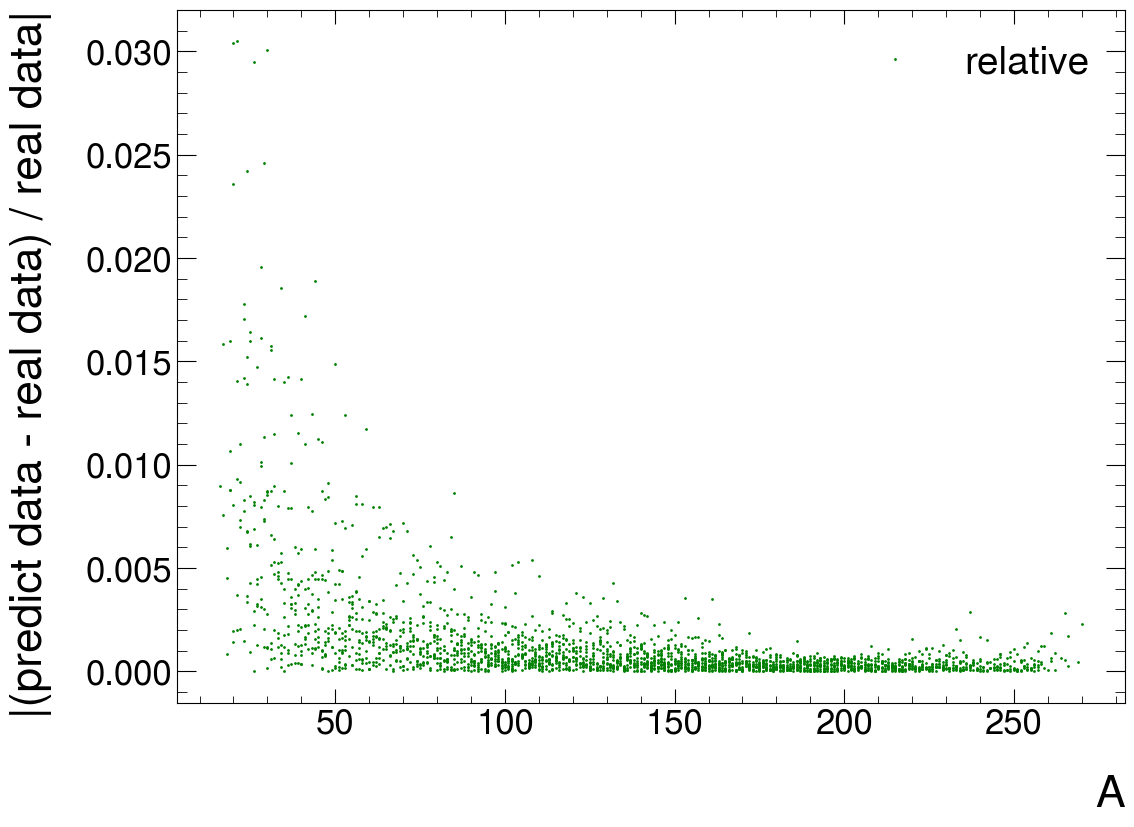

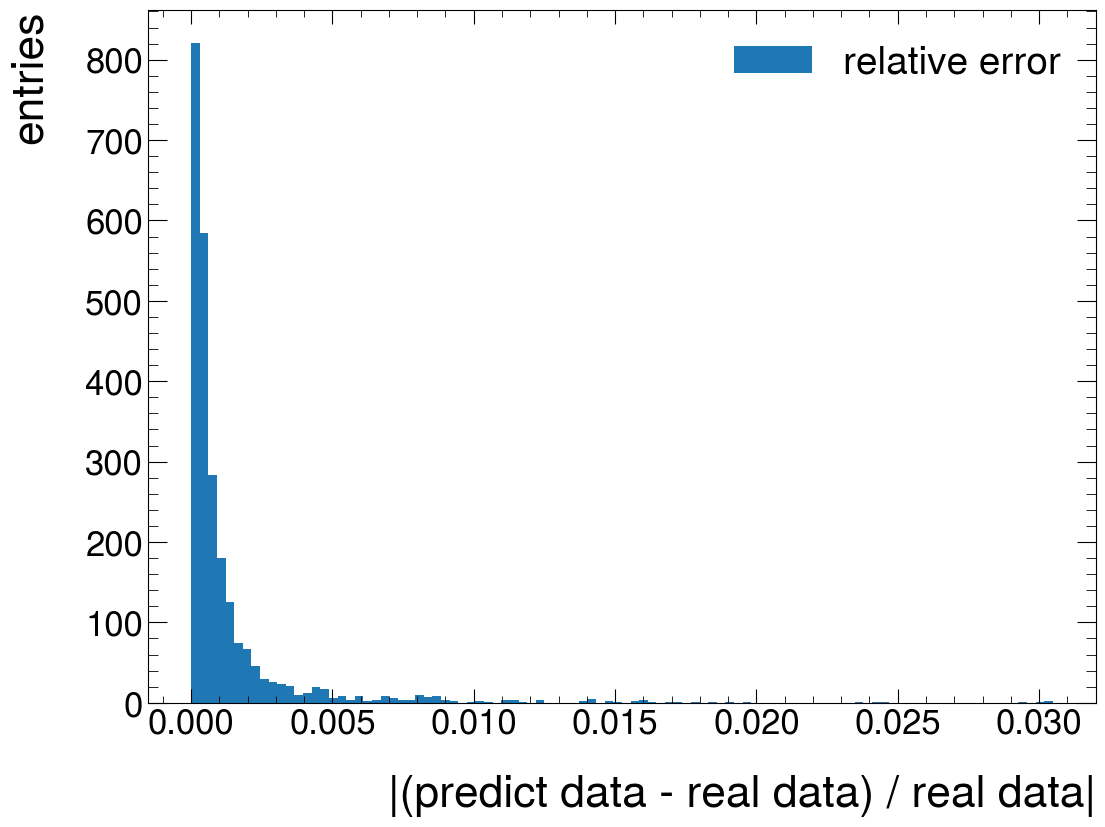

In [9]:
from sklearn.ensemble import RandomForestRegressor

cl = BindEnergyPredict(x_datas, y_datas, RandomForestRegressor())
cl.draw_2d()
cl.draw_relative_error()
cl.draw_hist_relative_error()